# ECE 590, Fall 2019 
## Problem Set 2 

## Full name: Lidia Azucena Morales Vasquez


### Problem 2 (Gaussian Mixture Model)

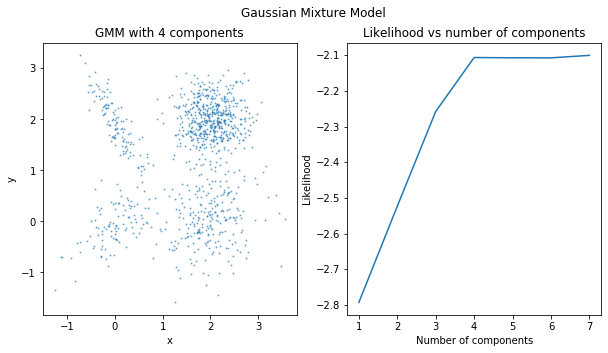

In [222]:
# GMM generator function
import numpy as np
def GMM_generator_2d(number, list_mean, list_cov, list_pi):
    """ Generates random samples from a Gaussian mixture model """
    r = np.random.choice(len(list_pi), number, p=list_pi)
    k = 0
    X = np.array([])
    Y = np.array([])
    for mean,cov,pi in zip(list_mean,list_cov,list_pi):
        x,y = np.random.multivariate_normal(mean, cov, sum(r==k)).T
        X = np.concatenate([X,x])
        Y = np.concatenate([Y,y])
        k += 1
    return X,Y


# Parameters 
mus = [[0,0],[0,2],[2,0],[2,2]]
pis = [1/8,1/8,1/4,1/2]
covs = [[[.2,.1],[.1,.2]],[[.1,-.15],[-.15,.3]],[[.3,.05],[.05,.3]],[[.15,0],[0,.15]]]

x,y=GMM_generator_2d(10**3,mus,covs,pis)

# Fitting the GMM
from sklearn.mixture import GaussianMixture

def GMM_fit(k,X):
    logl = []
    for ki in k:
        gmm = GaussianMixture(n_components=ki)
        gmm.fit(X)
        logl.append(gmm.score(X))
    return logl

k = np.arange(1,8,1)

# Plots
fig, axarr = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle("Gaussian Mixture Model", fontsize=12)

axarr[0].set_title(r'GMM with 4 components')
axarr[0].set_xlabel("x")
axarr[0].set_ylabel("y")
axarr[0].scatter(x,y, s=1, alpha = .5)

axarr[1].set_title(r'Likelihood vs number of components')
axarr[1].set_xlabel("Number of components")
axarr[1].set_ylabel("Likelihood")
X = np.vstack((x,y)).T
logl = GMM_fit(k,X)
axarr[1].plot(k,logl)
plt.show()

### Problem 3 (Bias-variance trade-off)

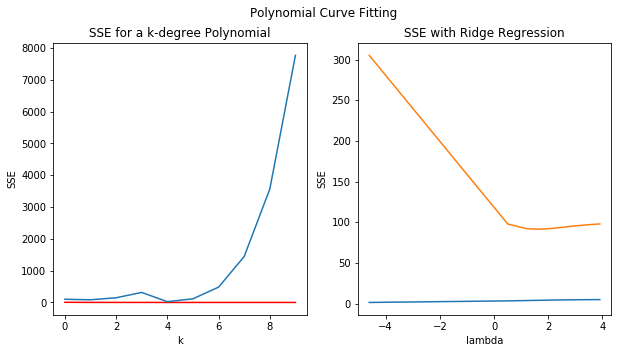

In [231]:
# Put your code here 
import warnings
import numpy
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy.polynomial.polynomial as poly

def f(x): return np.sin(2*x*np.pi) + np.cos(4*x*np.pi)

x_test = np.arange(0,1,.01)
t_test = f(x_test) 
x_train = np.arange(0,1,.2)
t_train = f(x_train)

def sse_polyfit(k,x_train,t_train,x_test,t_test):
    sse_train = []
    sse_test = []
    for ki in k:
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            coef = poly.polyfit(x_train, t_train, ki)
        t_train_fit = poly.polyval(x_train,coef)
        t_test_fit = poly.polyval(x_test,coef)
        sse_train.append(sum((t_train_fit-t_train)**2))
        sse_test.append(sum((t_test_fit-t_test)**2))
    return sse_train,sse_test

ks = list(range(16))
sse_train,sse_test=sse_polyfit(ks,x_train,t_train,x_test,t_test)

## 14 degree Polynomial
X_train = np.array([[xi**ki for ki in k] for xi in x_train])
X_test = np.array([[xi**ki for ki in k] for xi in x_test])

def sse_ridge_reg(lreg,X_train,t_train,X_test,t_test):
    sse_train = []
    sse_test = []
    for l in lreg:
        clf = Ridge(fit_intercept=False)
        clf.set_params(alpha = l)
        clf.fit(X_train, t_train)
        t_train_fit =clf.predict(X_train)
        t_test_fit =clf.predict(X_test)
        sse_train.append(sum((t_train_fit-t_train)**2))
        sse_test.append(sum((t_test_fit-t_test)**2))
    return sse_train, sse_test
    

# Plots
n=10
import matplotlib.pyplot as plt

fig, axarr = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle("Polynomial Curve Fitting", fontsize=12)

axarr[0].set_title(r'SSE for a k-degree Polynomial')
axarr[0].set_xlabel("k")
axarr[0].set_ylabel("SSE")
axarr[0].plot(ks[:n],sse_train[:n], c="red")
axarr[0].plot(ks[:n],sse_test[:n])

axarr[1].set_title(r'SSE with Ridge Regression')
axarr[1].set_xlabel("lambda")
axarr[1].set_ylabel("SSE")
lreg = np.arange(10**-2,50,np.exp(.5)) 
sse_train,sse_test = sse_ridge_reg(lreg,X_train,t_train,X_test,t_test)   
axarr[1].plot(np.log(lreg),sse_train)
axarr[1].plot(np.log(lreg),sse_test)
plt.show()

### Problem 6 (Nonlinear Basis Functions)

In [139]:
len(phi_2)

1000

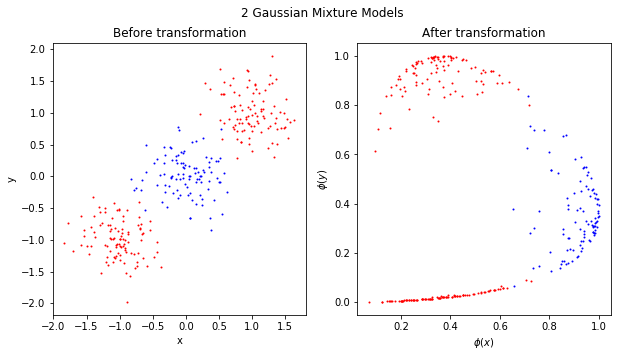

In [234]:
# Put your code here 

## GMM1
mu1 = [[0,0]]
cov1 = [[[.1,0],[0,.1]]]
pi1 = [1]
x_gmm1,y_gmm1 =GMM_generator_2d(100, mu1, cov1, pi1)

## GMM2
mu2 = [[-1,-1],[1,1]]
cov2 = [[[.1,0],[0,.1]],[[.1,0],[0,.1]]]
pi2 = [1/2,1/2]
x_gmm2, y_gmm2 = GMM_generator_2d(200, mu2, cov2, pi2)

## Second question

X_gmm1 = np.vstack((x_gmm1,y_gmm1)).T
X_gmm2 = np.vstack((x_gmm2,y_gmm2)).T

def phi_function(x,mu):
    return np.exp(-.5*(np.dot((x-mu),(x-mu))))

x_phi_GMM1 = [phi_function(xi,np.array(mu1).reshape(-1)) for xi in X_gmm1]
y_phi_GMM1 = [phi_function(xi,np.array(mu2[0]).reshape(-1)) for xi in X_gmm1]

x_phi_GMM2 = [phi_function(xi,np.array(mu1).reshape(-1)) for xi in X_gmm2]
y_phi_GMM2 = [phi_function(xi,np.array(mu2[0]).reshape(-1)) for xi in X_gmm2]

## Plot

import matplotlib.pyplot as plt
fig, axarr = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle("2 Gaussian Mixture Models", fontsize=12)

axarr[0].set_title(r'Before transformation')
axarr[0].set_xlabel("x")
axarr[0].set_ylabel("y")
axarr[0].scatter(x_gmm1,y_gmm1,c = "blue", s=1)
axarr[0].scatter(x_gmm2,y_gmm2,c = "red", s=1)

axarr[1].set_title(r'After transformation')
axarr[1].set_xlabel(r"$\phi(x)$")
axarr[1].set_ylabel(r"$\phi(y)$")
axarr[1].scatter(x_phi_GMM2,y_phi_GMM2,c = "red", s=1)
axarr[1].scatter(x_phi_GMM1,y_phi_GMM1,c = "blue", s=1)
plt.show()